1. DOWNLOADING THE DATASET

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
%cd '/content/drive/My Drive/cloud/'

Mounted at /content/drive
/content/drive/My Drive/cloud


2.LOAD THE DATASET

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. PERFORM BELOW VISUALIZATTIONS

   I. Univariate Analysis

In [3]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# importing modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

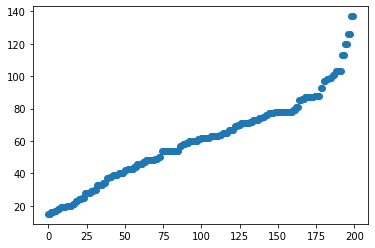

In [5]:
plt.scatter(df.index, df['Annual Income (k$)'])
plt.show()

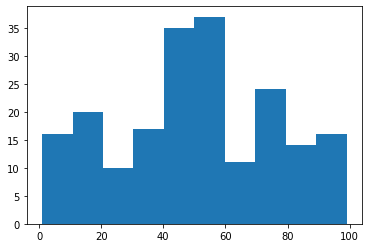

In [6]:
plt.hist(df['Spending Score (1-100)'])
plt.show()

ii.Bivariate Analysis

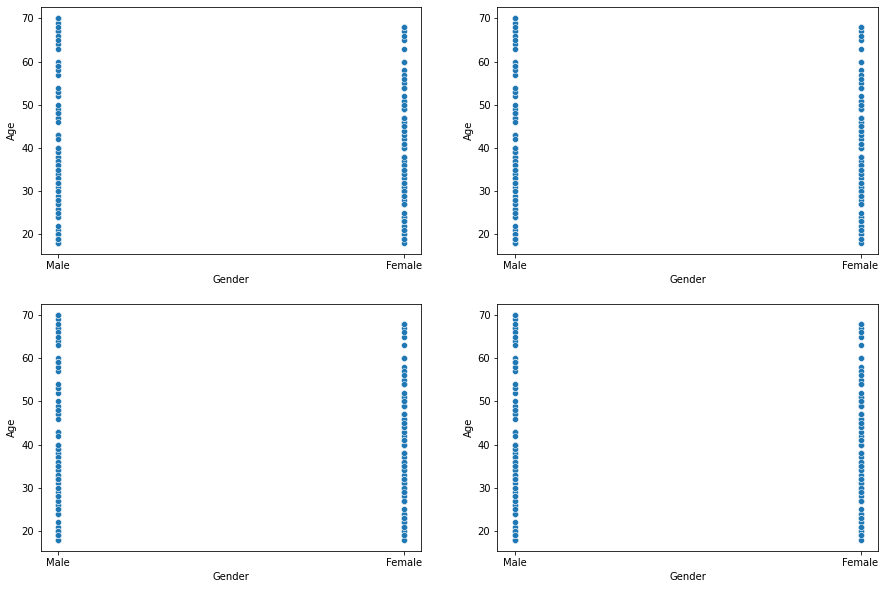

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axis=plt.subplots(2,2,figsize=(15,10))
#direct bilirubin shows positive correlation with total bilirubin
sns.scatterplot(x='Gender', y='Age', data=df, ax=axis[0,0])
sns.scatterplot(x='Gender', y='Age', data=df, ax=axis[0,1])
sns.scatterplot(x='Gender', y='Age', data=df, ax=axis[1,0])
sns.scatterplot(x='Gender', y='Age', data=df, ax=axis[1,1])
#linear positive correlation with coefficient as r=0.7 

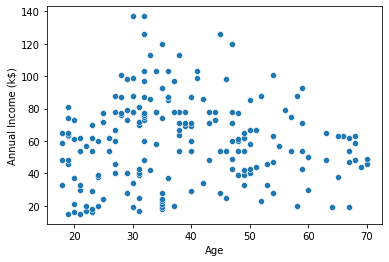

In [8]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
#non-linear negative correlation with coefficient as r=-1 

Estimated coefficients:
b_0 = 73.70119104335399 \nb_1 = -0.6049212623771938


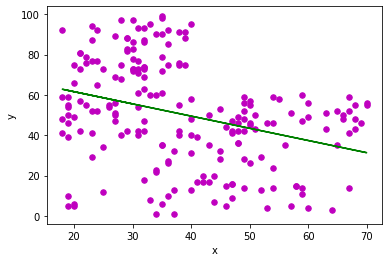

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",marker = "o", s = 30)
  # predicted response vector
  y_pred = b[0] + b[1]*x
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = df['Age']
  y = df['Spending Score (1-100)']
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \\nb_1 = {}".format(b[0], b[1]))
  plot_regression_line(x, y, b)
if __name__ == "__main__":
  main() 

In [11]:
#Chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df['Annual Income (k$)'])
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)') 

p value is 1.0
Independent (H0 holds true)


iii.Multivariate Analysis

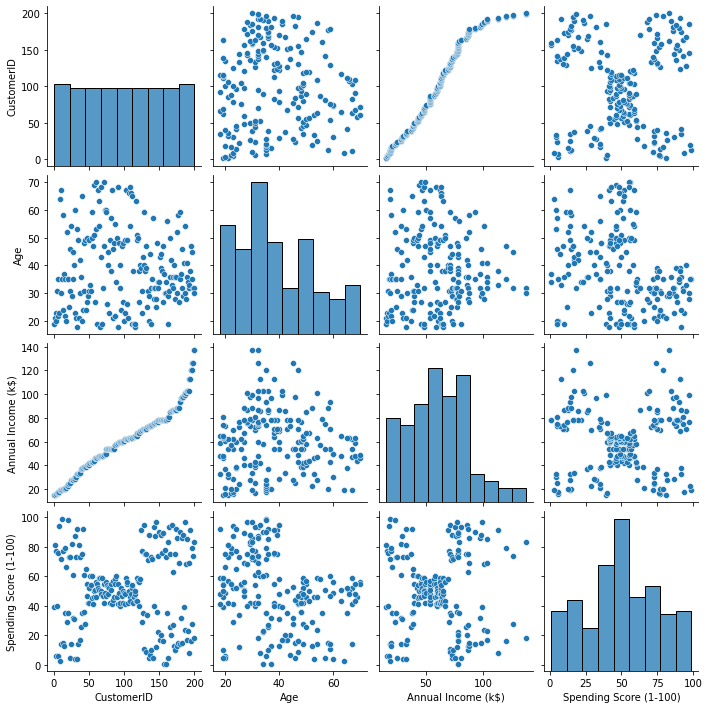

In [12]:
sns.pairplot(df);

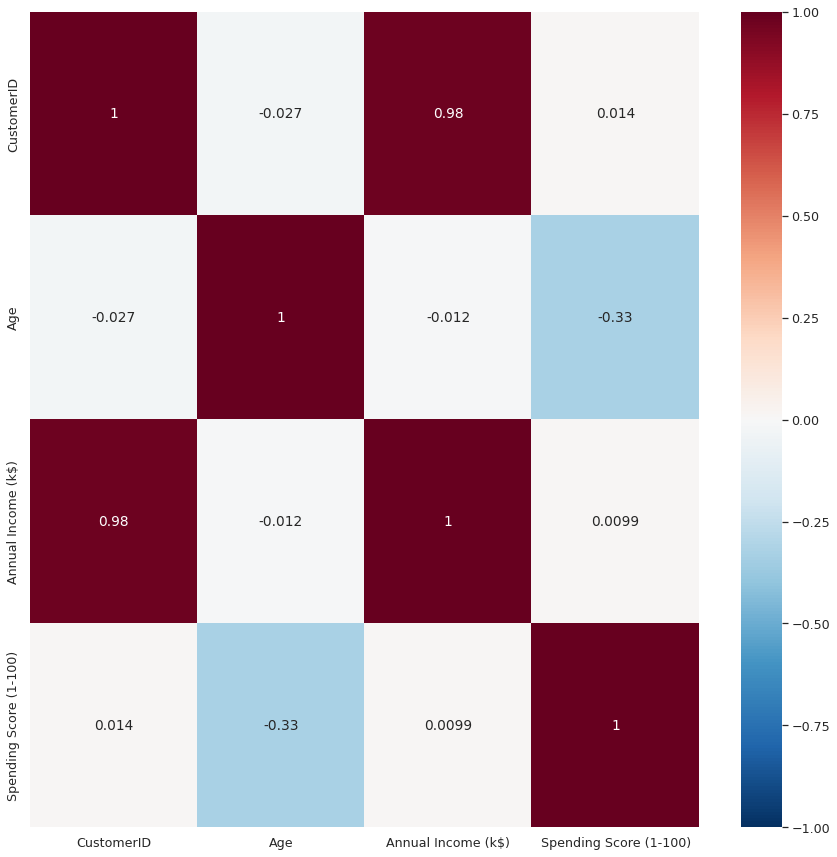

In [13]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

4. DESCRIPTIVE STATISTICS

In [14]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [15]:
df['Annual Income (k$)'].sum()

12112

In [17]:
df['Annual Income (k$)'].min()

15

In [18]:
df['Annual Income (k$)'].max()

137

In [19]:
df['Spending Score (1-100)'].abs()

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [20]:
df['Annual Income (k$)'].prod()

0

In [21]:
df['Annual Income (k$)'].cumprod()

0          15
1         225
2        3600
3       57600
4      979200
        ...  
195         0
196         0
197         0
198         0
199         0
Name: Annual Income (k$), Length: 200, dtype: int64

In [22]:
df['Annual Income (k$)'].cumsum()

0         15
1         30
2         46
3         62
4         79
       ...  
195    11586
196    11712
197    11838
198    11975
199    12112
Name: Annual Income (k$), Length: 200, dtype: int64

5. CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. FIND THE OUTLIERS AND DEAL WITH THEM

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [25]:
quantile = df.quantile(q = [0.75,0.25])
quantile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [26]:
Upper_extreme = quantile.iloc[0] + (1.5*IQR)
Upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [27]:
lower_extreme = quantile.iloc[1] - (1.5*IQR)
lower_extreme

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

7. CHECK FOR CATEGORICAL VALUES AND ENCODE THEM

In [28]:
df["OHC_Code"] = np.where(df["Gender"].str.contains("ohc"), 1, 0)

In [29]:
df[["Gender", "Age"]].head()

,Gender,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31


In [30]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df.Gender = lab.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),OHC_Code
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [31]:
categorical_values  = (df.dtypes == 'object')
categorical_variables = categorical_variables =[categorical_values.index[ind] 
for ind, val in enumerate(categorical_values) if val == True]

In [32]:
for types in df.dtypes.unique():
    print(types)
    print(df.select_dtypes(types).columns)

int64
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'OHC_Code'],
      dtype='object')


8. SPLIT THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLES

In [40]:
X = df.drop("Spending Score (1-100)",axis=1)
Y = df['Spending Score (1-100)']

In [41]:
X[:5]

,CustomerID,Gender,Age,Annual Income (k$),OHC_Code
0,1,1,19,15,0
1,2,1,21,15,0
2,3,0,20,16,0
3,4,0,23,16,0
4,5,0,31,17,0


In [42]:
Y[:5]

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

9. SCALE THE INDEPENDENT VARIABLES

In [43]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.42456879 -1.73899919  0.        ]
 [-1.70609137  1.12815215 -1.28103541 -1.73899919  0.        ]
 [-1.68877065 -0.88640526 -1.3528021  -1.70082976  0.        ]
 [-1.67144992 -0.88640526 -1.13750203 -1.70082976  0.        ]
 [-1.6541292  -0.88640526 -0.56336851 -1.66266033  0.        ]
 [-1.63680847 -0.88640526 -1.20926872 -1.66266033  0.        ]
 [-1.61948775 -0.88640526 -0.27630176 -1.62449091  0.        ]
 [-1.60216702 -0.88640526 -1.13750203 -1.62449091  0.        ]
 [-1.5848463   1.12815215  1.80493225 -1.58632148  0.        ]
 [-1.56752558 -0.88640526 -0.6351352  -1.58632148  0.        ]
 [-1.55020485  1.12815215  2.02023231 -1.58632148  0.        ]
 [-1.53288413 -0.88640526 -0.27630176 -1.58632148  0.        ]
 [-1.5155634  -0.88640526  1.37433211 -1.54815205  0.        ]
 [-1.49824268 -0.88640526 -1.06573534 -1.54815205  0.        ]
 [-1.48092195  1.12815215 -0.13276838 -1.54815205  0.        ]
 [-1.46360123  1.12815215 -1.20926872 -1.54815205  0.  

In [44]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)

In [45]:
X_scaled

,CustomerID,Gender,Age,Annual Income (k$),OHC_Code
0,-1.723412,1.128152,-1.424569,-1.738999,0.0
1,-1.706091,1.128152,-1.281035,-1.738999,0.0
2,-1.688771,-0.886405,-1.352802,-1.700830,0.0
3,-1.671450,-0.886405,-1.137502,-1.700830,0.0
4,-1.654129,-0.886405,-0.563369,-1.662660,0.0
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,0.0
196,1.671450,-0.886405,0.441365,2.497807,0.0
197,1.688771,1.128152,-0.491602,2.497807,0.0
198,1.706091,1.128152,-0.491602,2.917671,0.0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.05, random_state=0)

In [47]:
print(X_test, y_test)

     CustomerID    Gender       Age  Annual Income (k$)  OHC_Code
18    -1.411639  1.128152  0.943732           -1.433644       0.0
170    1.221111  1.128152  0.082532            1.009200       0.0
107    0.129905  1.128152  1.087265            0.093133       0.0
98    -0.025981  1.128152  0.656665            0.016795       0.0
177    1.342356  1.128152 -0.850435            1.047369       0.0
182    1.428960  1.128152  0.513132            1.429063       0.0
5     -1.636808 -0.886405 -1.209269           -1.662660       0.0
146    0.805414  1.128152  0.656665            0.627505       0.0
12    -1.515563 -0.886405  1.374332           -1.548152       0.0
152    0.909338 -0.886405  0.369598            0.665675       0.0 18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
Name: Spending Score (1-100), dtype: int64


11. BUILD THE MODEL

In [49]:
x = df.iloc[:, [3, 4]].values

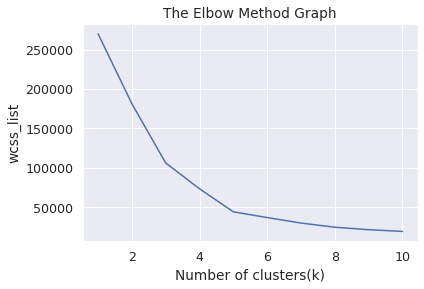

In [50]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [51]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

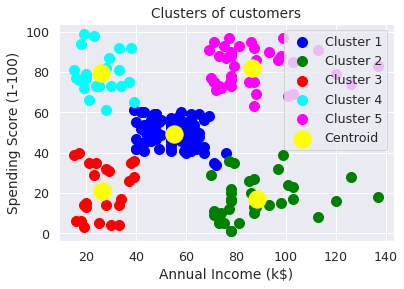

In [52]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()